# Movie Recommendation System


Building a movie recommendation system is a popular project in the field of machine learning and data science. There are several approaches to creating recommendation systems, including collaborative filtering, content-based filtering, and hybrid methods.This is a basic collaborative filtering recommendation system.

In [1]:
#importing the libraries.
import pandas as pd
import numpy as np

In [2]:
#loading the dataets to the dataframe.
df=pd.read_csv('movies.csv')
df1=pd.read_csv('ratings.csv')
df2=pd.read_csv('tags.csv')

In [3]:
#shape of the movie dataframe.
df.shape

(9742, 3)

In [4]:
#Shape of ratings dataframe.
df1.shape

(100836, 4)

In [5]:
#Shape of tags dataframe.
df2.shape

(3683, 4)

In [6]:
#Top 5 rows of movie Dataframe.
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
#Top 5 rows of ratings dataframe.
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
#Top 5 rows of tags dataframe.
df2.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
#Detailed information of movie dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
#Detailed information of ratings dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
#Detailed information of tags dataframe.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [12]:
#Combining movies and ratings dataframe.
merged_df=pd.merge(df,df1,on='movieId',how='inner')

In [13]:
#Checking how many unique values are present in the merged dataframe.
merged_df.nunique()

movieId       9724
title         9719
genres         951
userId         610
rating          10
timestamp    85043
dtype: int64

In [14]:
#Top 5 row of merged dataframe.
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [15]:
#displaying sample 5 rows.
merged_df.sample(5)

,movieId,title,genres,userId,rating,timestamp
98075,121231,It Follows (2014),Horror,306,3.0,1518380574
99696,152071,Race (2016),Drama,567,1.5,1525289151
97105,111781,Mission: Impossible - Rogue Nation (2015),Action|Adventure|Thriller,448,2.0,1437765440
94902,97172,Frankenweenie (2012),Animation|Comedy|Horror|IMAX,111,2.0,1516156129
35712,1784,As Good as It Gets (1997),Comedy|Drama|Romance,542,3.5,1163387105


In [16]:
#Which movie has the maximum number of ratings.
max_movie_rating=merged_df[merged_df['rating']==merged_df['rating'].max()]['title'].values[0]

In [17]:
max_movie_rating

'Toy Story (1995)'

In [18]:
#Combining Movies and Tags dataframe using ouyter join method.
merged_df1=pd.merge(df,df2,on='movieId',how='outer')

In [19]:
merged_df1

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
3,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1.528844e+09
4,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1.528844e+09
...,...,...,...,...,...,...
11848,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
11849,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
11850,193585,Flint (2017),Drama,NaN,NaN,NaN
11851,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


In [20]:
#What are the tags associated with the movie 'Matrix, The (1999)' in the provided dataset?
matrix_tags = merged_df1[merged_df1['title'] == 'Matrix, The (1999)']['tag']

In [21]:
matrix_tags

2674          martial arts
2675                sci-fi
2676    alternate universe
2677            philosophy
2678      post apocalyptic
Name: tag, dtype: object

In [22]:
#What is the average user rating for the movie 'Terminator 2: Judgment Day (1991)' in the provided dataset?
terminator_ratings = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']['rating']
terminator_ratings.mean()

3.970982142857143

In [23]:
#What are the user ratings given to the movie 'Fight Club (1999)' in the provided dataset?
fight_club_ratings=merged_df[merged_df['title']=='Fight Club (1999)']['rating']

In [24]:
fight_club_ratings

49835    5.0
49836    2.0
49837    0.5
49838    2.5
49839    3.5
        ... 
50048    5.0
50049    4.0
50050    5.0
50051    5.0
50052    5.0
Name: rating, Length: 218, dtype: float64

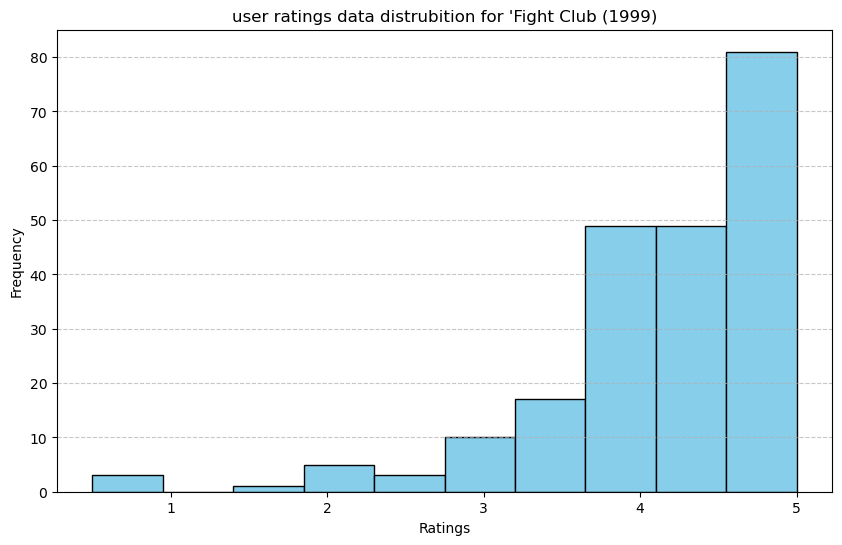

In [25]:
#plot the data distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(fight_club_ratings, bins=10, color='skyblue', edgecolor='black')
plt.title("user ratings data distrubition for 'Fight Club (1999)")
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

The distribution of the data exhibits a left-skewed pattern.

In [26]:
#Determining the count of ratings and the average rating for each movie.
ratings_grouped=df1.groupby('movieId').agg({'rating':['count','mean']})

In [27]:
#Renaming the aggregated column.
ratings_grouped.columns=['rating_count','average_rating']

In [28]:
ratings_grouped

,rating_count,average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [29]:
#Combining the columns from ratings_grouped to the movie dataframe using inner join.
merged_df3=pd.merge(df, ratings_grouped, left_on='movieId',right_index=True, how='inner')

In [30]:
merged_df3

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9739,193585,Flint (2017),Drama,1,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [31]:
#Which movies in the dataset have received more than 50 ratings?
filtered_movies=merged_df3[merged_df3['rating_count']>50]

In [32]:
filtered_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8372,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8376,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8475,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [33]:
#Most popular movie in the dataset based on average rating of the user.
most_popular_movie=filtered_movies.loc[filtered_movies['average_rating'].idxmax()]

In [34]:
most_popular_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
Name: 277, dtype: object

In [35]:
#Which are the top 5 popular movies based on rating count?
top5_popular_movies=filtered_movies.nlargest(5,'rating_count')

In [36]:
top5_popular_movies

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [37]:
#Which movies, with more than 50 ratings, belong to the Science Fiction (Sci-Fi) genre?
sci_fi_movies=filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

In [38]:
sci_fi_movies

,movieId,title,genres,rating_count,average_rating
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7693,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7767,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8376,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8475,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [39]:
#What is the third most popular Sci-Fi movie, considering the rating count, among those with more than 50 ratings?
Third_popular_scifi_movies=sci_fi_movies.nlargest(3,'rating_count').iloc[-1]

In [40]:
Third_popular_scifi_movies

movieId                                        480
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
rating_count                                   238
average_rating                                3.75
Name: 418, dtype: object

In [45]:
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


# Recommendation systems

Create a recommendation DataFrame using pivot_table:
Rows represent users, columns represent movie titles, and values represent user ratings.

In [50]:
rec_df=merged_df.pivot_table(index=['userId'],columns=['title'],values='rating')

In [52]:
#filling the null values with 0.
rec_df.fillna(0)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


Function to recommend a movie.

In [53]:
def recommend_movie(movie):
    #Extract user ratings for the specified movie.
    movie_watched=rec_df[movie]
    #Calculate the correlation of specified movie with other movies.
    similar_movies=rec_df.corrwith(movie_watched)
    # Sort movies in descending order of correlation to find similar ones.
    similar_movies=similar_movies.sort_values(ascending = False)
    #return the top 5 similar movies.
    return similar_movies.head()

In [62]:
recommend_movie("Interstellar (2014)")

title
Iron Monkey (Siu nin Wong Fei-hung ji: Tit Ma Lau) (1993)    1.0
Misérables, Les (2000)                                       1.0
Elephant (2003)                                              1.0
Mumford (1999)                                               1.0
End of Days (1999)                                           1.0
dtype: float64

In conclusion, the recommendation analysis has provided valuable insights into user preferences and movie similarities. By leveraging collaborative filtering and correlation measures, we identified movies that exhibit strong associations with the user's watched movie. This method not only enhances personalized recommendations but also sheds light on the underlying patterns in user behavior, contributing to a more informed and engaging movie recommendation system.